# Расчетная работа по курсу: Теория вероятности и статистика<br/>Раздел 2

## Импортируем все необходимые библиотеки

Здесь:
- Numpy и его подмодули:
    - `numpy` - общий модуль для работы с тензорами и статистических вычислений

- SciPy и его подмодули
    - `stats` - для получения функции плотности вероятности из модуля `norm`
    - `optimize` - для получения функции минимизации
    - `integrate` - для подсчета интеграла

- MatPlotLib и Seaborn:
    - `matplotlib.pyplot` или `plt` - для графиков

In [1]:
import numpy as np

from scipy import stats
from scipy import optimize
import scipy.integrate as integrate

import matplotlib.pyplot as plt

import re

## Вводим данные по варианту и `SEED` для повторяемости результатов
Функция плотности распределения:
$$
    f(x)=\left\{\begin{array}{ll}
        \dfrac{1}{a} \Big( 1-\dfrac{|x|}{a} \Big) \ \> ,|x| \le a 
            \\ \\
        0 \qquad \qquad \quad ,|x|>a \end{array} \right.
$$

<br/><br/>Константы:
<br/>$a=2$
<br/>$\alpha=0.05$
<br/>$\gamma=0.95$
<br/>$n=300$

<br/><br/>Где:
<br/>$a$ - параметр для функции распределения
<br/>$\alpha$ - уровень значимости
<br/>$\gamma$ - доверительный интервал
<br/>$n$ - объем выборки

In [2]:
a = 2        # Параметр для функции распределения 
n = 300      # Уровень значимости
ALPHA = 0.05 # Доверительный интервал
GAMMA = 0.95 # Объем выборки

SEED = 228   # Для повторяемости результатов

## 1.0 Моделирование функции распределения и аналитический расчет параметров
Параметры: $MX$, $DX$, $F(x)$, $F^{-1}(u)$

### Найдем $F(x)$ аналитически
Так как $F(x)$ вычисляется по формуле:
$$F(x)=\int_{-\infty}^{x}f(t)dt$$
То мы должны взять интеграл от кусочно-заданной функции.
$$
    \int_{-\infty}^{x}f(t)dt=\int_{-\infty}^{0}0 \ dt \ \ + \ \ \int_{0}^{x}\dfrac{1}{a} \Big( 1-\dfrac{|t|}{a} \Big)dt 
        =0 + \int_{0}^{x}\dfrac{1}{a} \Big( 1-\dfrac{|t|}{a} \Big)dt 
        =\int_{0}^{x}\dfrac{1}{a} \Big( 1-\dfrac{|t|}{a} \Big)dt
$$
$$\int_{-\infty}^{x}f(t)dt=\frac{x}{2}-\frac{x^2}{8} \qquad \text{при} \ x > 0$$
$$F(x)=\frac{x}{2}-\frac{x^2}{8} \qquad \text{при} \ x > 0$$

#### Запишем функции

In [3]:
def f(x):
    if abs(x) > a:
        return 0
    else:
        return (1 - abs(x) / a) / a

In [4]:
def F(x):
    return (x / 2) - (x**2 / 8)

#### График функции плотности распределения

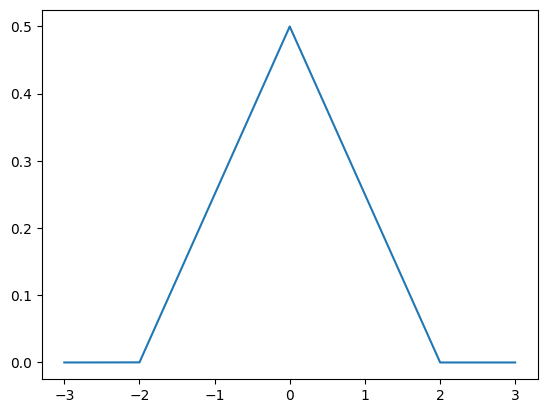

In [5]:
x = np.linspace(-3, 3, 100_000)
y = [f(val) for val in x]
plt.plot(x, y)
plt.show()

#### График функции распределения

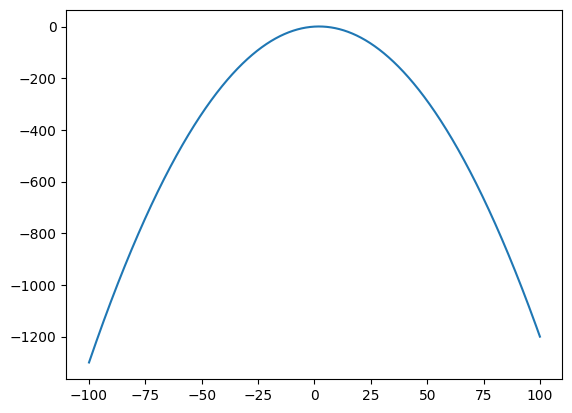

In [6]:
x = np.linspace(-100, 100, 100_000)
y = [F(val) for val in x]
plt.plot(x, y)
plt.show()

In [7]:
MX = 3.9          
DX = 4.3            
SIGMA = np.sqrt(DX)

def ff(x, mean, sd):
    return (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)#(1 / (SIGMA * np.sqrt(2 * np.pi))) * np.exp(-((x - MX)**2 / (2 * DX)))

ff(100, MX, DX)

4.6986378518625975e-108

In [8]:
from random import random

res = np.zeros(100_000)
for i in range(100_000):
    res[i] = ff(random() * 10 + random() * 10, MX, DX)

res

array([ 3.78118682, 13.23012033,  1.37883543, ...,  3.15612584,
        0.10357801, 13.49667152])

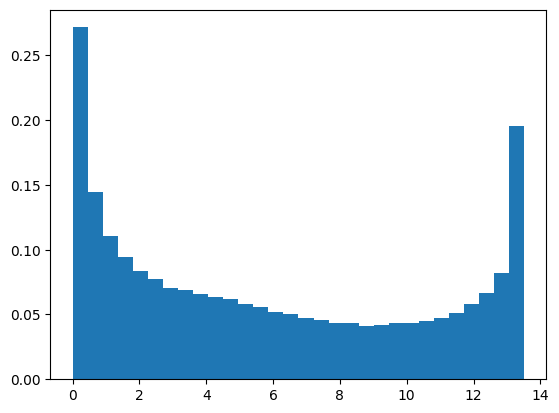

In [9]:
_, theoretic_x, _ = plt.hist(res, 30, density=True)

In [10]:
import math
import random

def normal_distribution(mean, std_dev, size):
    samples = []
    for _ in range(size):
        u1 = 1.0 - random.random()  # Уменьшаем диапазон случайных чисел до (0, 1)
        u2 = 1.0 - random.random()
        z = math.sqrt(-2.0 * math.log(u1)) * math.cos(2.0 * math.pi * u2)
        sample = mean + z * std_dev
        samples.append(sample)
    return samples

# Пример использования:
mean = 100
std_dev = 100
size = 1000
samples = normal_distribution(mean, std_dev, size)
print(samples[:10])  # Вывести первые 10 сэмплов

[-173.59658233041813, 124.65374752968408, 12.317685222890447, 115.18455516344412, 126.95350454208466, 123.68933544158747, -214.76965372624983, 12.6024635098603, -39.80702818406053, 150.15154578625743]


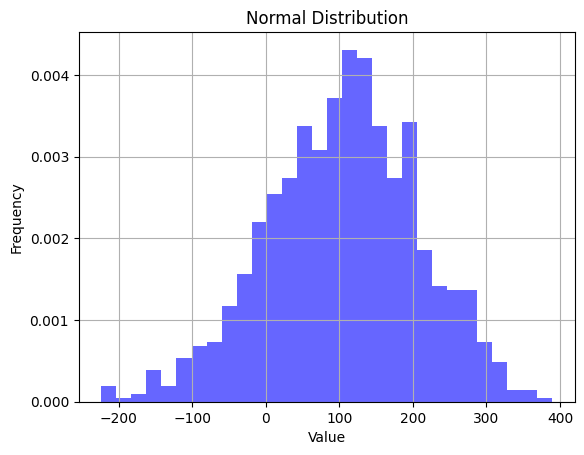

In [11]:
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')  # Построение гистограммы
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()